# ✅ 항공 데이터 분석

## ✅ 설정

In [25]:
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Noto') != -1 :
        print(i.name)

Noto Sans KR


In [24]:
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans Kr'
rcParams['axes.unicode_minus']= False

항공사 지연 요인 분석 보고서
## ✅ 1. 프로젝트 개요   
- 분석 목적: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시   
- 데이터 출처: 항공 운항 지연률 데이터 (총 33,468건)   
- 분석 대상 변수:   
    - pct_carrier_delay: 운항사 요인   
    - pct_atc_delay: 관제 요인   
    - pct_weather_delay: 기상 요인   
    - airline: 항공사명   

## ✅ 2. 파일 불러오기 및 1차원 데이터 / 결측치 확인

In [2]:
import pandas as pd 
df = pd.read_csv('data/airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [3]:
# 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


수치형 데이터 3개, 범주형 데이터 3개 확인

| 변수명                 | 데이터 타입  | 변수 종류                  |
| ------------------- | ------- | ---------------------- |
| `pct_carrier_delay` | float64 | **수치형** (항공사 자체 지연 비율) |
| `pct_atc_delay`     | float64 | **수치형** (관제 지연 비율)     |
| `pct_weather_delay` | float64 | **수치형** (날씨 지연 비율)     |
| `airline`           | object  | **범주형** (항공사명)         |


## ✅ 수치형 데이터, 범주형 데이터 확인

In [4]:
# 밸류값 확인
df.head(2)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American


In [84]:
# 운항횟수
# Delta가 압도적으로 많음
# American / Southwest / United 가 비슷
# Alasks / Jet Blue 가 비슷

air_run = df['airline'].value_counts()

In [8]:
# 수치형 데이터만 모아보기

num_df = df.select_dtypes(include='number').head() 
num_df 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [19]:
# 결측치 여부 확인
# num_df.iloc[:] == len(num_df)

missing_count = df.isnull().sum() # 결측치 있음
missing_ratio = (missing_count/len(df))*100

In [22]:
#결측치 요약표 출력
missing_df = pd.DataFrame({
    'Missing Count':missing_count,
    'Missing Ratio (%)':missing_ratio
}).sort_values(by='Missing Count', ascending=False)

missing_df[missing_count_df['Missing Count']>0]

,Missing Count,Missing Ratio (%)
pct_carrier_delay,28,0.083662
pct_atc_delay,28,0.083662
pct_weather_delay,28,0.083662


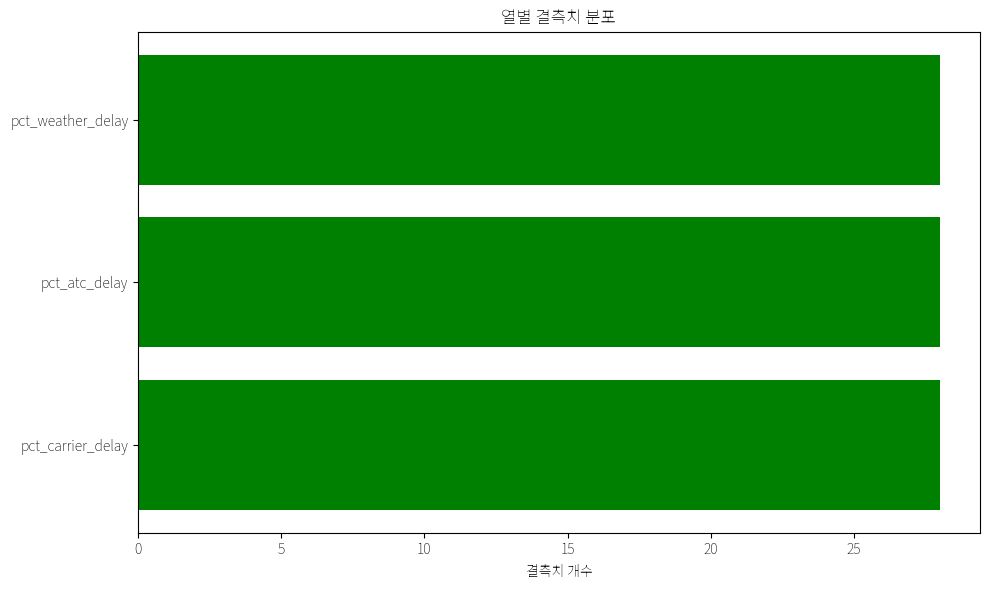

In [27]:
import matplotlib.pyplot as plt

# 결측치 있는 컬럼만 시각화
missing_df = missing_df[missing_df['Missing Count']>0]

plt.figure(figsize=(10,6)) # 도화지 생성
plt.barh(missing_df.index, missing_df['Missing Count'], color = 'green')
plt.xlabel('결측치 개수')
plt.title('열별 결측치 분포')
plt.tight_layout()
plt.show()

In [ ]:
# A. 결측값이 있는 행 제거
df_dropna = df.dropna()

# B. 전체 평균으로 결측값 대체
df_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())

# 항공사별 중앙값으로 대체 
df_group = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
     df_group[col] = df.groupby('airline')[col].transform(lambda x : x.fillna(x.median()))

In [33]:

# 수치형 변수만 추출
num_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']


# 수치형 변수만 추출
num_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

#describe 비교
desc_dropna = df_dropna[num_cols].describe().add_prefix('dropna_')
desc_filled = df_filled[num_cols].describe().add_prefix('filled_')
desc_group = df_group[num_cols].describe().add_prefix('group_')

# 세 개 결과를 하나로 합치기
summary_all = pd.concat([desc_dropna, desc_filled, desc_group], axis=1)
import pandas as pd
from IPython.display import display
display(summary_all)

,dropna_pct_carrier_delay,dropna_pct_atc_delay,dropna_pct_weather_delay,filled_pct_carrier_delay,filled_pct_atc_delay,filled_pct_weather_delay,group_pct_carrier_delay,group_pct_atc_delay,group_pct_weather_delay
count,33440.000000,33440.000000,33440.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000,33468.000000
mean,7.041475,5.089962,0.684776,7.041475,5.089962,0.684776,7.040845,5.089187,0.684473
std,4.497596,4.718647,1.073743,4.495714,4.716672,1.073294,4.495832,4.716795,1.073355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000,4.147084,2.148281,0.000000,4.147084,2.148281,0.000000
50%,6.356893,3.900000,0.316002,6.359631,3.903367,0.316655,6.357260,3.900299,0.316002
75%,9.140474,6.630238,0.935161,9.136141,6.625000,0.934579,9.136141,6.625000,0.934579
max,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333,100.000000,100.000000,33.333333


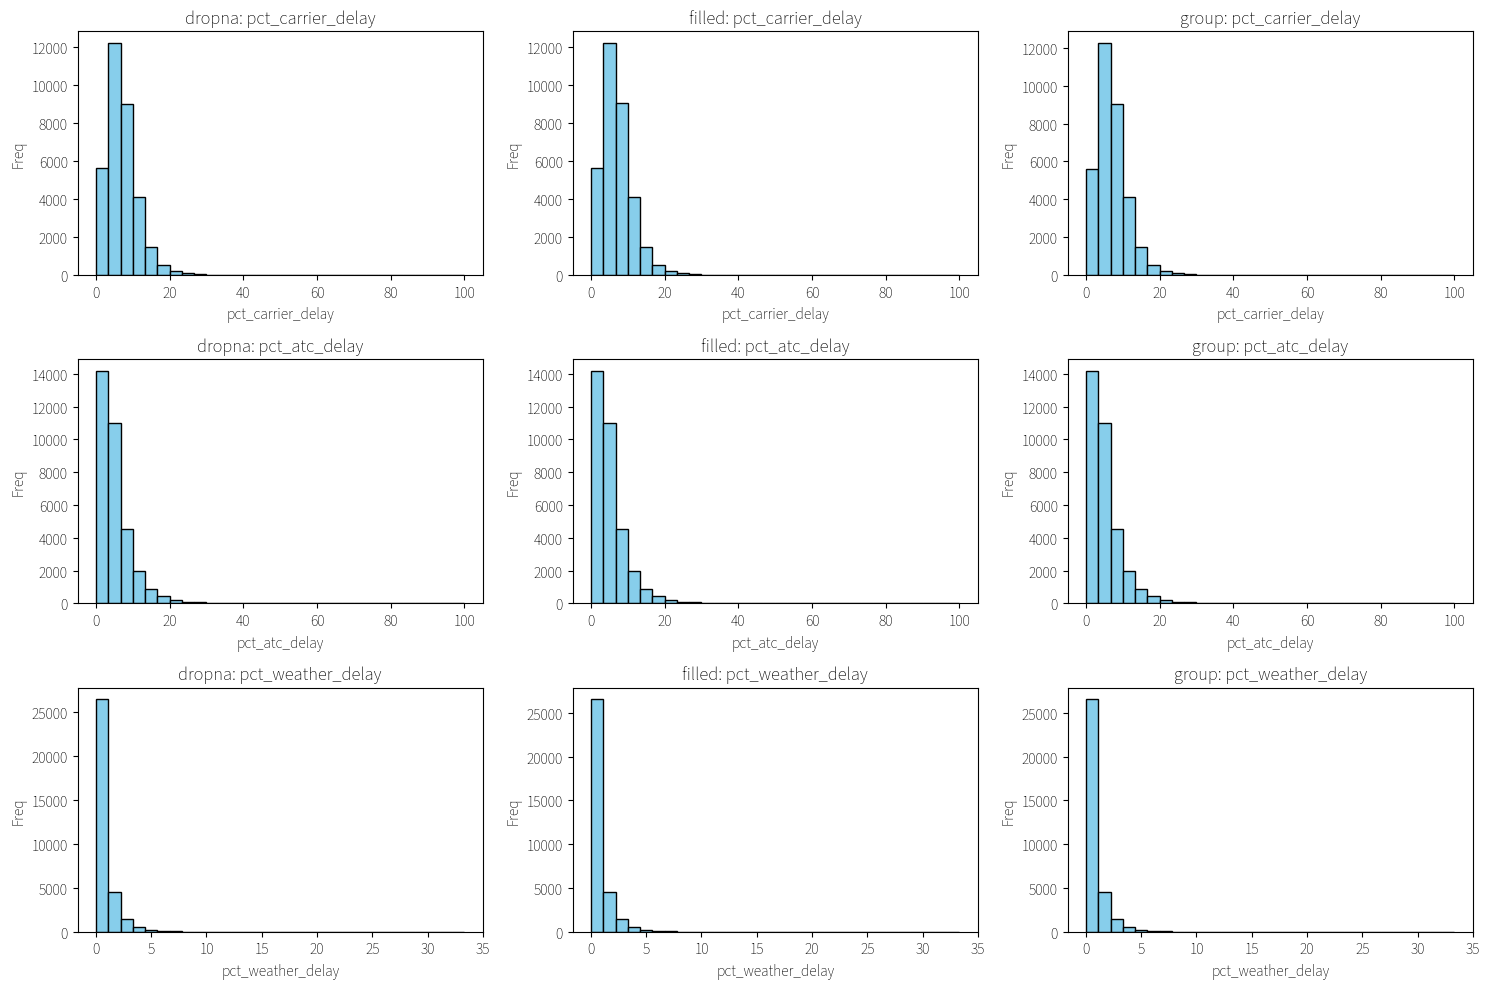

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
datasets = [('dropna', df_dropna), ('filled', df_filled), ('group', df_group)]

for i, col in enumerate(num_cols):
    for j, (label, data) in enumerate(datasets):
        axes[i, j].hist(data[col], bins=30, color='skyblue', edgecolor='black')
        axes[i, j].set_title(f'{label}: {col}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Freq')

plt.tight_layout()
plt.show()

평균 대체는 데이터 수를 유지하면서 평균은 같지만 분산이 약간 줄어든다.
그룹 평균 대체는 항공사별 특징을 유지하면서 보다 정교한 대체 방식이다.
dropna는 샘플 수가 줄어들어 외곽값의 영향이 커질 수 있다.
선택된 처리 방식: 항공사별 그룹 평균 대체

결론: 본 분석에서는 항공사별 그룹 평균을 이용한 결측치 보간 방식을 적용하였다.
이는 데이터 손실을 최소화하고 항공사별 지연률 특성을 보존하여, 이후 분석의 정확도를 높일 수 있다.

## ✅ 탐색적 데이터 분석


### ✅ 변수별 분포

- 히스토그램 및 상자그림(boxplot) 시각화   
- 이상치(outlier) 여부 확인

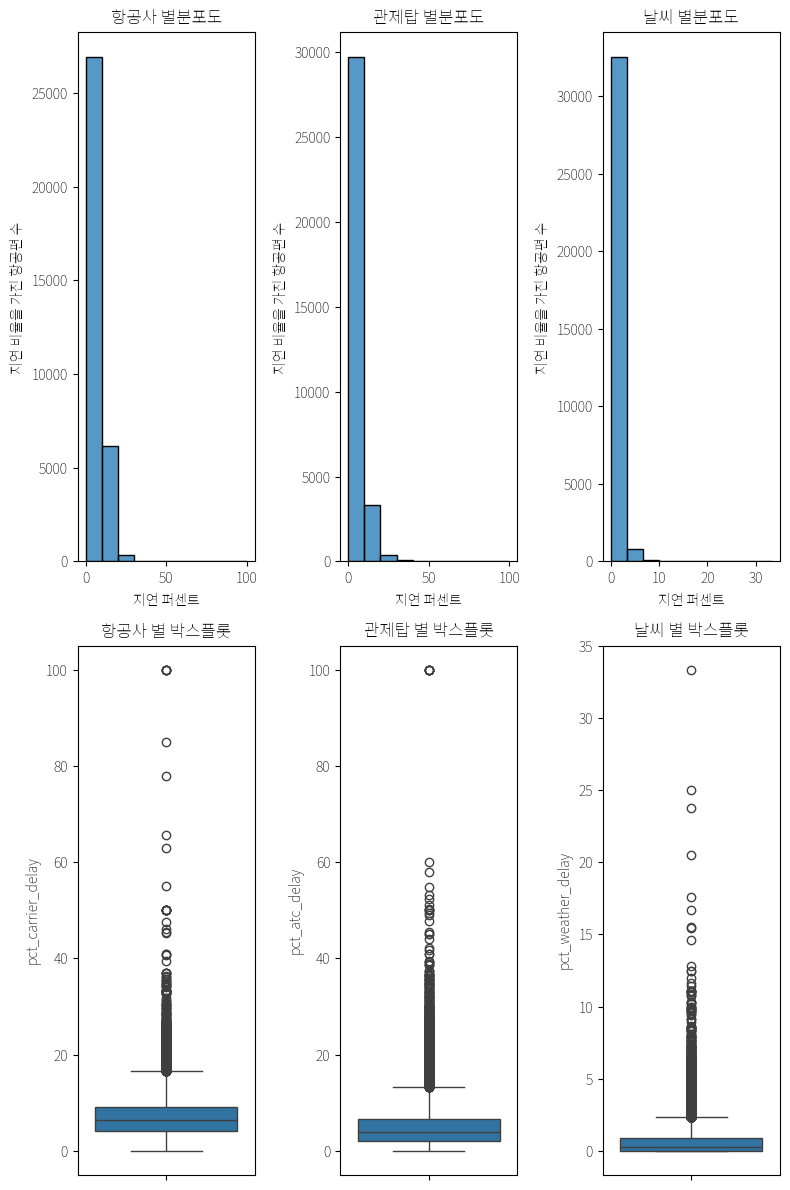

In [48]:
numeric_columns = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
kr_columns = ['항공사 별', '관제탑 별', '날씨 별']

import seaborn as sns 
import matplotlib.pyplot as plt

# 수치형 변수의 히스토그램
plt.figure(figsize=(8,12))
for i, (col,col_kr) in enumerate(zip(numeric_columns, kr_columns), start=1):

    plt.subplot(2, 3, i )
    sns.histplot(df_group[col],bins=10, kde=False)
    plt.title(f"{col_kr}분포도")
    plt.ylabel('지연 비율을 가진 항공편 수 ')
    plt.xlabel('지연 퍼센트')
    
    plt.subplot(2,3,i+3)
    sns.boxplot(df_group[col])
    plt.title(f"{col_kr} 박스플롯")

plt.tight_layout() # 공백제거
plt.show() # 그래프 보여주는 거 

### 💬 히스토그램 설명
✅ x축: 지연 비율 (delay percentage)
각 히스토그램의 x축은 0 ~ 100% 사이의 값입니다.

예: pct_carrier_delay 값이 10이라면, 전체 운항 중 10%가 항공사 문제로 지연된 것을 의미합니다.

✅ y축: 해당 지연 비율에 해당하는 데이터(횟수) 개수
y축은 해당 구간의 지연 비율을 가진 항공편 수를 의미합니다.

예: x축 구간이 510%일 때 y값이 200이면, 지연 비율이 510%인 항공편이 200개라는 뜻입니다.

### 💬 박스플롯 해석
✅ 항공사 지연: 
박스플롯이 길고 점이 많음 → "일부 항공편은 매우 지연되었고, 지연 정도도 다양함. 항공사 자체 문제에서 발생"

✅ 관제탑 지연: 이상치 하나가 비정상적으로 지연 정규화 필요

✅ 날씨 지연:
박스플롯이 짧고 점이 많음 " 일부 항공편은 지연은 길지 않고 지연률도 일정함"

### ✅ 항공사별 비교

In [74]:
import seaborn as sns
import matplotlib.pylab as plt
import math

In [111]:
airline_list = df_group.iloc[:,3].unique()

# y축 공유를 위한 최대값 구하기 (세 지연 비율 중 가장 큰 값의 최대)
def bars(x) : 
    ymax = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().max().max()
    ymax = ymax*1.2

    num_airlines = len(x)
    cols=3
    rows = math.ceil(num_airlines/cols)

    
    fig, axs = plt.subplots(rows, cols , figsize=(10, num_airlines * 1), sharey=True)

    axs = axs.flatten()

    for i, airline in enumerate(x):
        subset = df[df['airline'] == airline]
        mean_values = subset[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()
        
        axs[i].bar(['항공사', '관제탑', '날씨'], mean_values, color=['skyblue', 'orange', 'lightgreen'])
        axs[i].set_title(f"{airline} 지연 원인별 평균 비율")
        axs[i].set_ylabel('지연 비율 (%)')
        axs[i].set_ylim(0, ymax + 2)

    plt.tight_layout()
    plt.show()


In [85]:
air_run

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [114]:
li = df_group.iloc[:,3].unique()
air_li = [li[0],li[4],li[5]]
air_li2 = [li[1],li[2]]



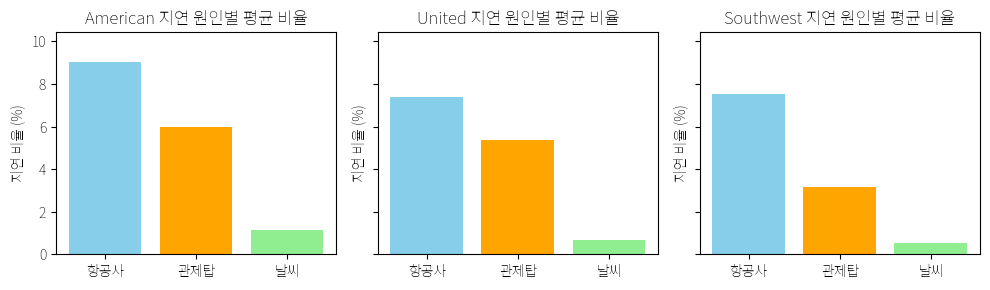

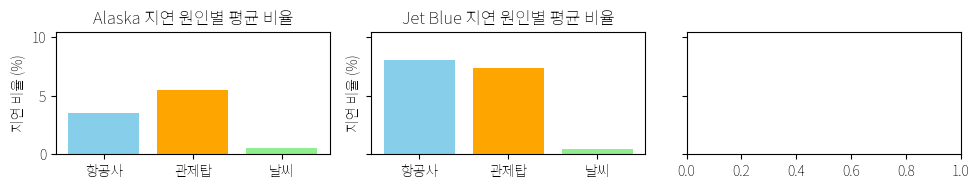

In [115]:
bars(air_li)
bars(air_li2)

In [121]:
df_group

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [124]:
df_group.groupby('airline')['pct_atc_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,5.472672,5.699303,0.0,1.878614,3.776860,7.001330,54.838710
American,5725.0,5.993177,4.646397,0.0,3.109278,4.986523,7.594203,60.000000
Delta,9107.0,4.461720,4.361595,0.0,1.818182,3.508108,5.835833,100.000000
Jet Blue,3775.0,7.344591,5.226060,0.0,3.785014,6.136905,9.610506,40.986111
Southwest,5584.0,3.147019,2.513162,0.0,1.612527,2.559242,3.790421,21.542722
United,5426.0,5.345934,4.987158,0.0,2.442792,4.353647,7.017497,100.000000


단순 운행 지연 비율 비교


## ✅ 2차원 데이터 분석

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


### ✅ 공분산 및 상관계수 분석

### ✅ 다중공선성 분석

## ✅ 인사이트 도출

## ✅ 결론 및 제안

## ✅ 첨부자료

In [ ]:
# 수치형 데이터 변수 기초 통계량
num_df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,5.000000,5.000000,5.000000
mean,8.140751,4.556607,1.229775
std,2.347923,3.680866,0.835070
min,5.959924,1.971774,0.000000
25%,7.157270,2.706231,0.762097
50%,7.333333,3.365591,1.585878
75%,8.153226,3.706107,1.774194
max,12.100000,11.033333,2.026706


관제탑 지연율 이상치, 스케일 확인필요

결측치 존재함  -> 중앙값으로 대체 필요 

✅
1.   
2.   
3. 추가 분석   
4. 상관관계 분석   
5. 공분산 확인   
6. 다음 분석 방향 계획   